- IMPORTS NECESSÁRIOS

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import missingno as msg
import numpy as np

- CARREGANDO DATASETS

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

- ANALISANDO DADOS

In [3]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
train.describe(include='object')

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,...,Q028,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
count,13730,13730,13730,13730,13121,13121,4282,4282,1638,1638,...,6354,13730,13730,13730,13730,13730,13730,13730,13730,13730
unique,13730,2632,27,2,2343,27,1475,27,61,27,...,5,8,4,3,4,4,5,4,3,4
top,86eacf2706fbbcb50ef90b4fdb53ad7d66b5874c,São Paulo,SP,F,São Paulo,SP,São Paulo,SP,SECRETARIA ESTADUAL - CE,CE,...,E,A,A,A,A,A,A,A,A,A
freq,1,565,2138,8491,681,2053,199,808,175,324,...,2128,10758,12881,12055,10833,6591,11726,11932,9331,11104


In [5]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [7]:
train.shape

(13730, 167)

- IGUALANDO AS VARIAVEIS PRESENTES NOS 2 DATASETS

In [8]:
columns = list(test.columns)
columns.append("IN_TREINEIRO")

In [9]:
train =  train[columns]

In [10]:
num_train = train.select_dtypes(include=['int64', 'float64'])
num_test = test.select_dtypes(include=['int64', 'float64'])

- VISUALIZANDO DADOS AUSENTES E SUBSTITUINDO VALORES

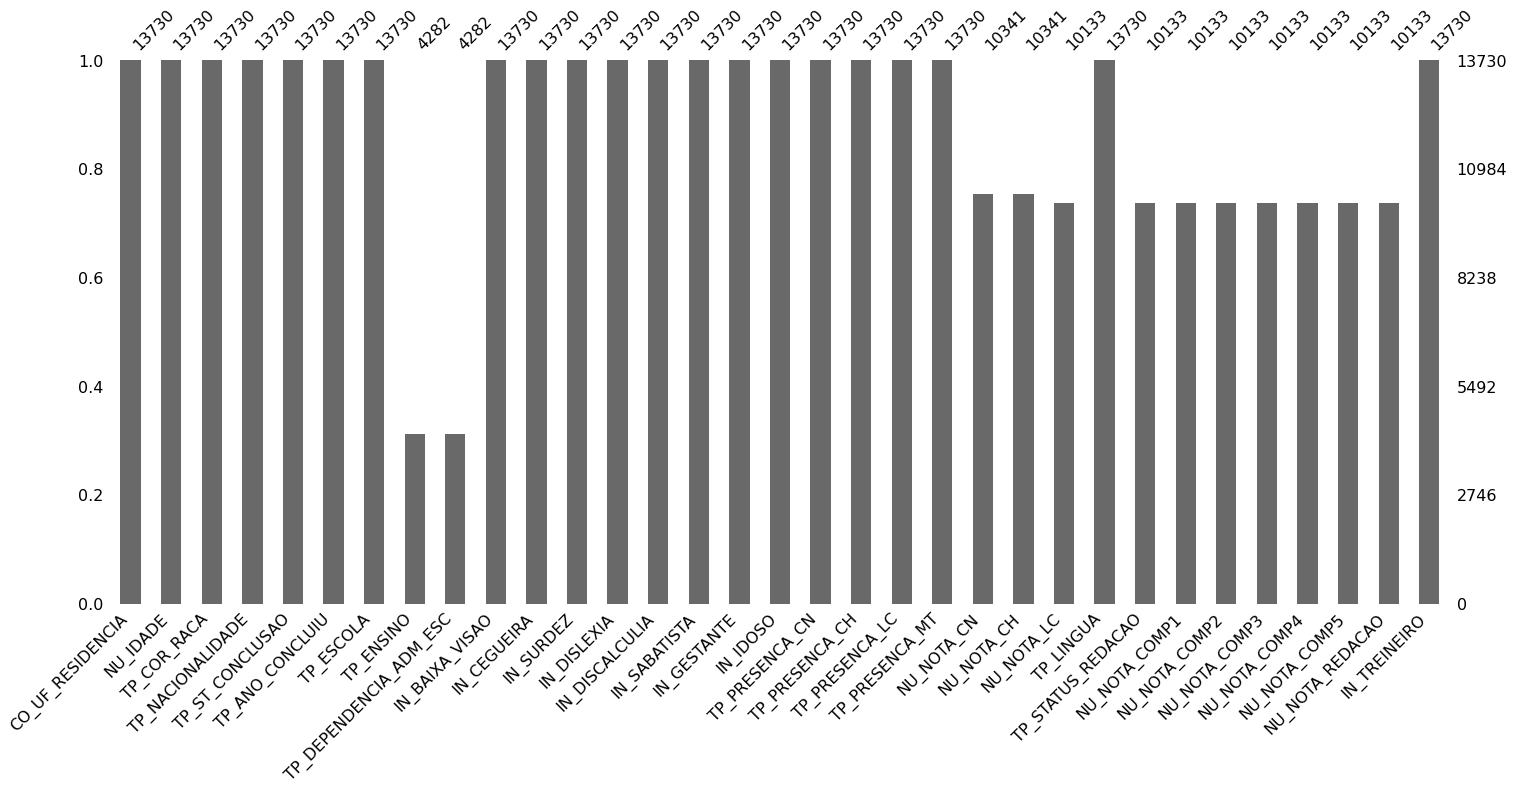

In [11]:
msg.bar(num_train);

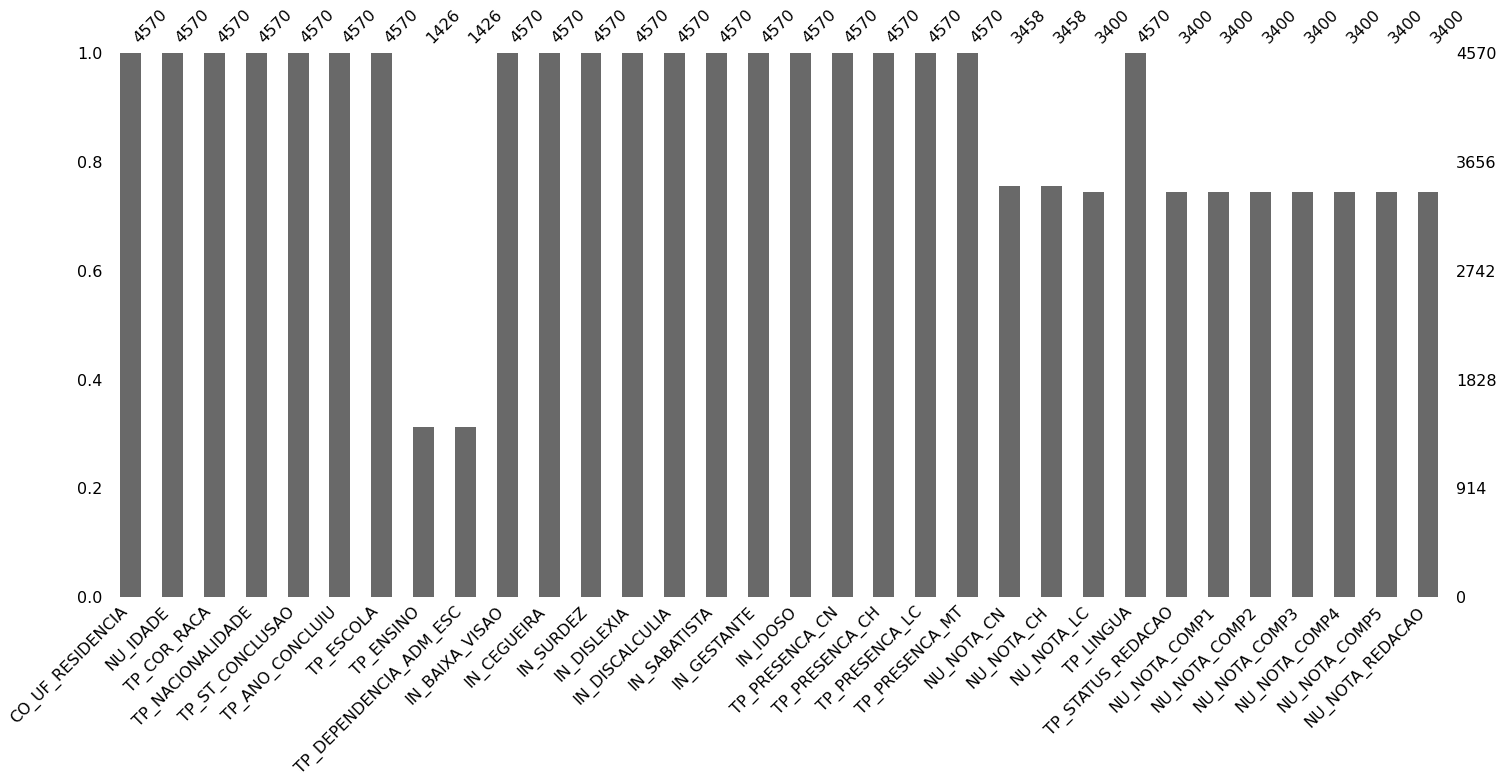

In [12]:
msg.bar(num_test);

In [13]:
num_test = num_test.replace(np.NAN, 0)
num_train = num_train.replace(np.NAN, 0)

- ANALISANDO BALANCEAMENTO DE TREINO

In [14]:
num_train.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

- SEPARANDO TARGET E TREINO

In [15]:
x_train = num_train.drop(["IN_TREINEIRO"], axis=1)
target = num_train['IN_TREINEIRO']
x_test = num_test

- REDUÇÃO DE DIMENSIONALIDADE E BALANCEAMENTO DE DADOS TREINO

In [16]:
pca = PCA(n_components=2)
pca.fit(x_train)
pca_train = pca.transform(x_train)

In [17]:
smote = SMOTE(sampling_strategy="minority")
smote_train, smote_target = smote.fit_resample(x_train, target)
smote_pca = pca.transform(smote_train)

In [18]:
smote_target.value_counts(dropna=False)

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

- MODELO PREDITIVO E CSV RESPOSTA

In [19]:
clf = RandomForestClassifier(n_estimators=350)
clf.fit(smote_train, smote_target)

RandomForestClassifier(n_estimators=350)

In [20]:
pred = clf.predict(x_test)

In [21]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
answer['IN_TREINEIRO'] = pred
answer.to_csv('answer.csv', index=False, header=True)

- Sua nota é: 99.628009